# **<span style="color:green">Image processing tp 3</span>**

# ***<span style="color:green">1/ Image en niveau de gris</span>***

In [45]:
import math
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Image, display

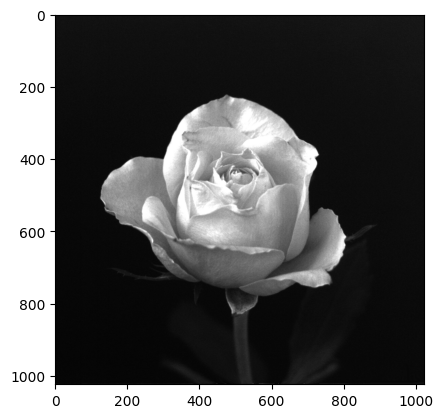

In [28]:
#charger l'image en niveau de gris
img = cv.imread('rose.tif', cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

In [29]:
#Calcul de la luminosité :la moyenne des pixels , closer to 255 "brighter" closer to 0 "less bright"
l = np.sum(img) / (img.shape[0] * img.shape[1])


In [30]:
#Calcul du contraste :lecart type des pixels , big "large gap between dark and bright pixels"
c = math.sqrt(np.sum((img - l) ** 2) / (img.shape[0] * img.shape[1]))


In [55]:
#lhistogramme "pour chaque niveau de gris en va compter le nombre de pixels" max=127..
hist = [0]*256    # une list avec 255 starting from 0 so 256
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        hist[img[i][j]] += 1             # img[i][j] = brightness lvl of the pix (0/255) / incrémenter le tableau correspondant à l'intensité du pixel

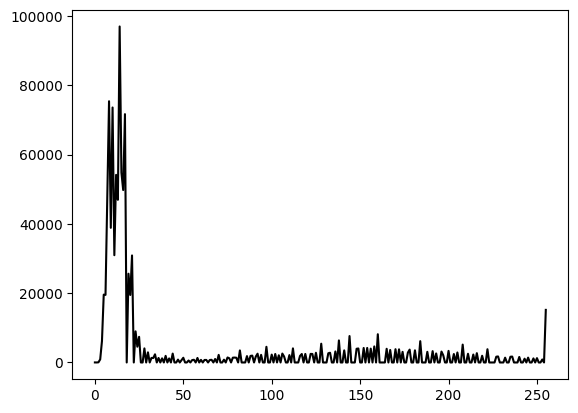

66.10413489735092
46.789353370666504


In [56]:
plt.plot(hist, color='black')
plt.show()
print(c)
print(l)
#x(brightness levels) / y(how many pixels have that)
#curve high on (left=more dark pix) (right=more bright pix)
#if its spreads everywhere "etalé" no bias (huge contrast) / "etroit" tight in one area (weak contrast)
# Pic a gauche beaucoup de pixels sombres ,peu de valeurs a droite presque pas de zones claires
# faible luminosite et  high to moderate contraste 

# ***<span style="color:green">2/ Image en couleur</span>***

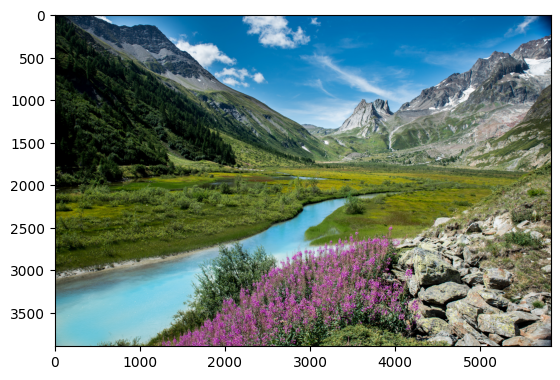

In [57]:
#Chargement de l'image :
imgC = cv.imread('nature.tif')
plt.imshow(cv.cvtColor(imgC, cv.COLOR_BGR2RGB))

In [58]:
#Séparation des canaux :
R , G ,B = cv.split(imgC)


In [59]:
#Calcul des histogrammes :
histR = [0] * 256
histG = [0] * 256
histB = [0] * 256


for i in range(imgC.shape[0]):
    for j in range(imgC.shape[1]):
        histR[R[i][j]] += 1
        histG[G[i][j]] += 1
        histB[B[i][j]] += 1

In [ ]:
#inter^retation:  high contrast ,Green channel is dominant and spread out =varied green shades 
#the Blue channel is  darker 
#and the Red channel shows a distinct spike in the bright areas due to the vibrant pink/purple flowers

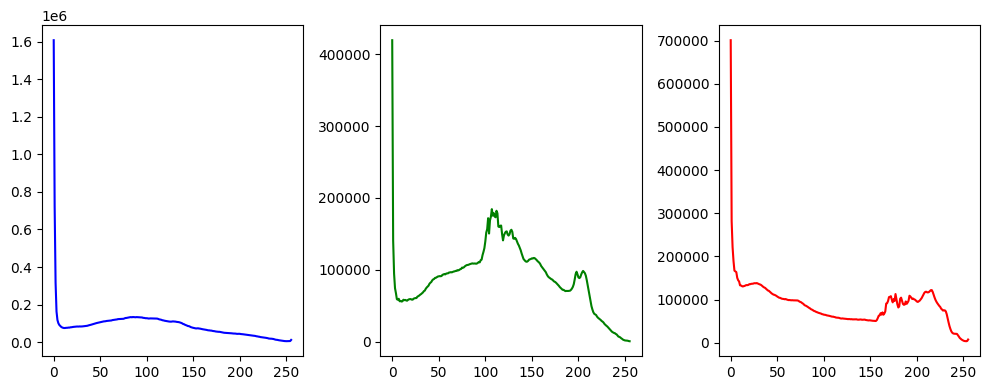

In [60]:
#affichage dhisto
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
plt.plot(histB, color='blue')

plt.subplot(1,3,2)
plt.plot(histG, color='green')

plt.subplot(1,3,3)
plt.plot(histR, color='red')

plt.tight_layout()
plt.show()

# ***<span style="color:green">3/ Appliquer des méthodes d’amélioration de la luminosité et de contraste</span>***

# ****<span style="color:green">fig1:</span>****

In [104]:
fig1 = cv.imread('Fig1.tif', cv.IMREAD_GRAYSCALE)

# ****<span style="color:green">MANUAL</span>****

In [123]:
#Calculer la luminosité son histogramme normalisé et cumulé: " used a fct this time
Lfig1 = np.mean(fig1)
print( "luminosité",Lfig1)

H1 = cv.calcHist([fig1], [0], None, [256], [0, 256]) # 0= 1 channel grayscal/ rgb= 0-1-2

#manual norm
H1_norm=[0]*256
for i in range(256) :
    H1_norm[i]= H1[i] / (fig1.shape[0] * fig1.shape[1]) # tot num of pix
print(sum(H1_norm)) # check if =1 we r good to go (psc c des prob )


# manual norm cumulative hist 
H1_cum=[0]*256
H1_cum[0] = H1_norm[0]
for i in range(1, 256):
    H1_cum[i] = H1_cum[i-1] + H1_norm[i]  # add up gradually
# Just to make sure no values go above 1
H1_cum = np.clip(H1_cum, 0, 1)

luminosité 38.759796477690344
[1.]


In [88]:
# operations on image

# manual trans (La translation d'histogramme permet de faire varier la luminosité de l'image sans modifier le contraste)
fig1_translated = fig1 + 50 # nv val=anc val +offset
fig1_translated = np.clip(fig1_translated, 0, 255)
fig1_translated=fig1_translated.astype(np.uint8)#uint8=data type used for image (0/255)


In [98]:
# manual expension dynamique Cette transformation ne fait qu’améliorer la qualité visuelle de l’image

h, w = fig1.shape

# Find the min and max pixel values in the image
min_valeur = np.min(fig1)
max_valeur = np.max(fig1)

# Create Look Up Table "LUT"
LUT = np.zeros(256, dtype=np.uint8) 

# Fill LUT with expanded values
for i in range(256):
    LUT[i] = np.clip(255 * (i - min_valeur) / (max_valeur - min_valeur), 0, 255)

# Apply the LUT to every pixel
fig1_expanded = np.zeros_like(fig1)
for x in range(h):
    for y in range(w):
        fig1_expanded[x, y] = LUT[fig1[x, y]]



In [99]:
# manual hist egaliisation (Cette méthode permet d renforcer le contraste surdes détails de l'image et donc d'obtenir une distribution uniforme)
# etapes : calculer hist norm-> hist norm cum -> Modification des intensités Heq(k)=(L-1)* HCN(k)->Transf niveaux de gris par I[i, j] = H_eg[I[i, j]]



L = 256
h, w = fig1.shape
#Modification des intensités 
H_eg = [round((L - 1) * float(H1_cum[i])) for i in range(256)]
#

fig1_eg = np.zeros_like(fig1)
for i in range(h):
    for j in range(w):
        fig1_eg[i, j] = H_eg[fig1_eg[i, j]]

In [100]:
# calcule d'hist

hist_translated = cv.calcHist([fig1_translated], [0], None, [256], [0, 256])
hist_expanded = cv.calcHist([fig1], [0], None, [256], [0, 256])
hist_equalized = cv.calcHist([fig1_eg], [0], None, [256], [0, 256])

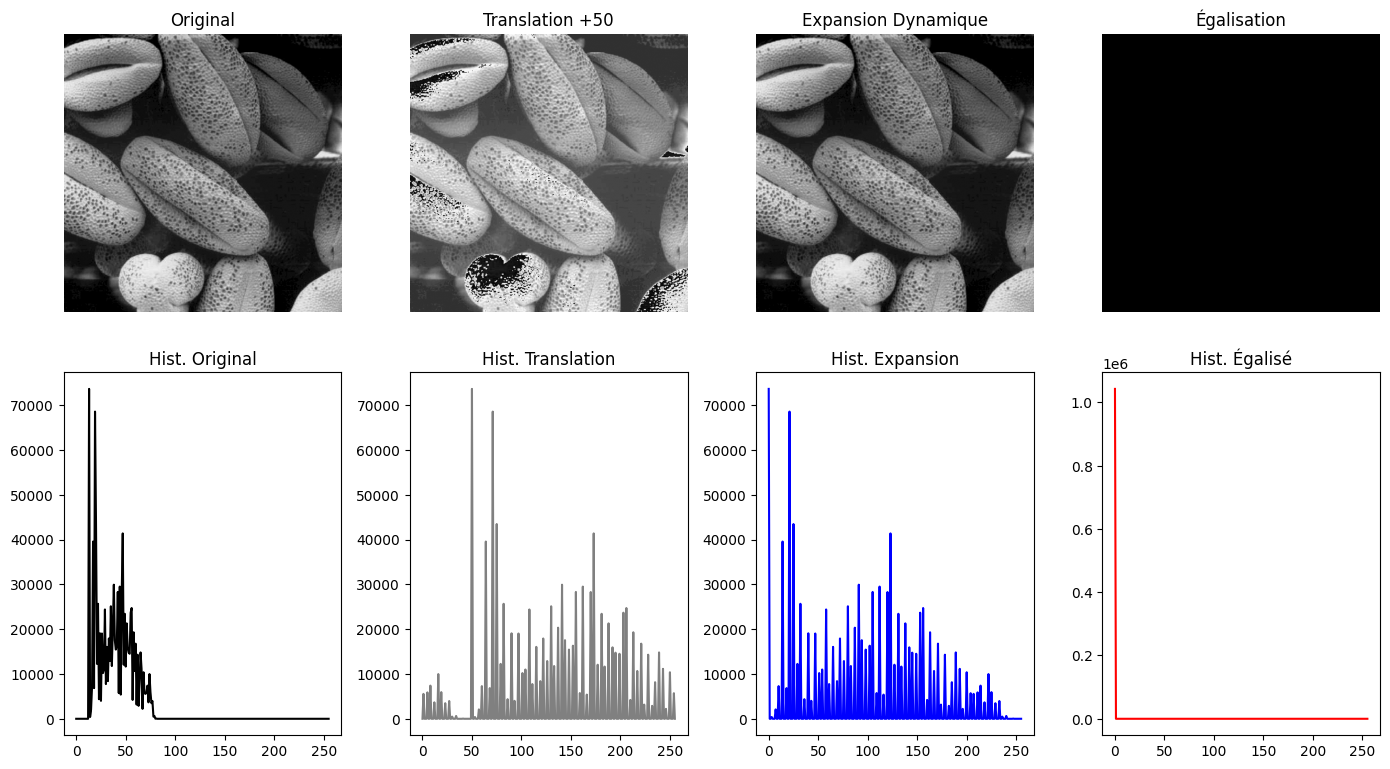

In [101]:

# --- show all results ---
plt.figure(figsize=(14, 8))

plt.subplot(2, 4, 1)
plt.imshow(fig1, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(fig1_translated, cmap='gray')
plt.title('Translation +50')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(fig1_expanded, cmap='gray')
plt.title('Expansion Dynamique')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(fig1_eg, cmap='gray')
plt.title('Égalisation')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.plot(H1, color='black')
plt.title('Hist. Original')

plt.subplot(2, 4, 6)
plt.plot(hist_translated, color='gray')
plt.title('Hist. Translation')

plt.subplot(2, 4, 7)
plt.plot(hist_expanded, color='blue')
plt.title('Hist. Expansion')

plt.subplot(2, 4, 8)
plt.plot(hist_equalized, color='red')
plt.title('Hist. Égalisé')

plt.tight_layout()
plt.show()

# ****<span style="color:green">USING FUNCTIONS</span>****

In [112]:
# Translation  avec opencv
fig1_translated_cv = cv.add(fig1, 50)

# Expansion Dynamique 
fig1_expanded_cv = cv.normalize(fig1, None, 0, 255, cv.NORM_MINMAX)

# Egalisation
fig1_eg_cv = cv.equalizeHist(fig1)

In [113]:
# Calcul des hist
hist_fig1 = cv.calcHist([fig1], [0], None, [256], [0, 256])
hist_fig1_translated_cv = cv.calcHist([fig1_translated_cv], [0], None, [256], [0, 256])
hist_fig1_expanded_cv = cv.calcHist([fig1_expanded_cv], [0], None, [256], [0, 256])
hist_fig1_eg_cv = cv.calcHist([fig1_eg_cv], [0], None, [256], [0, 256])

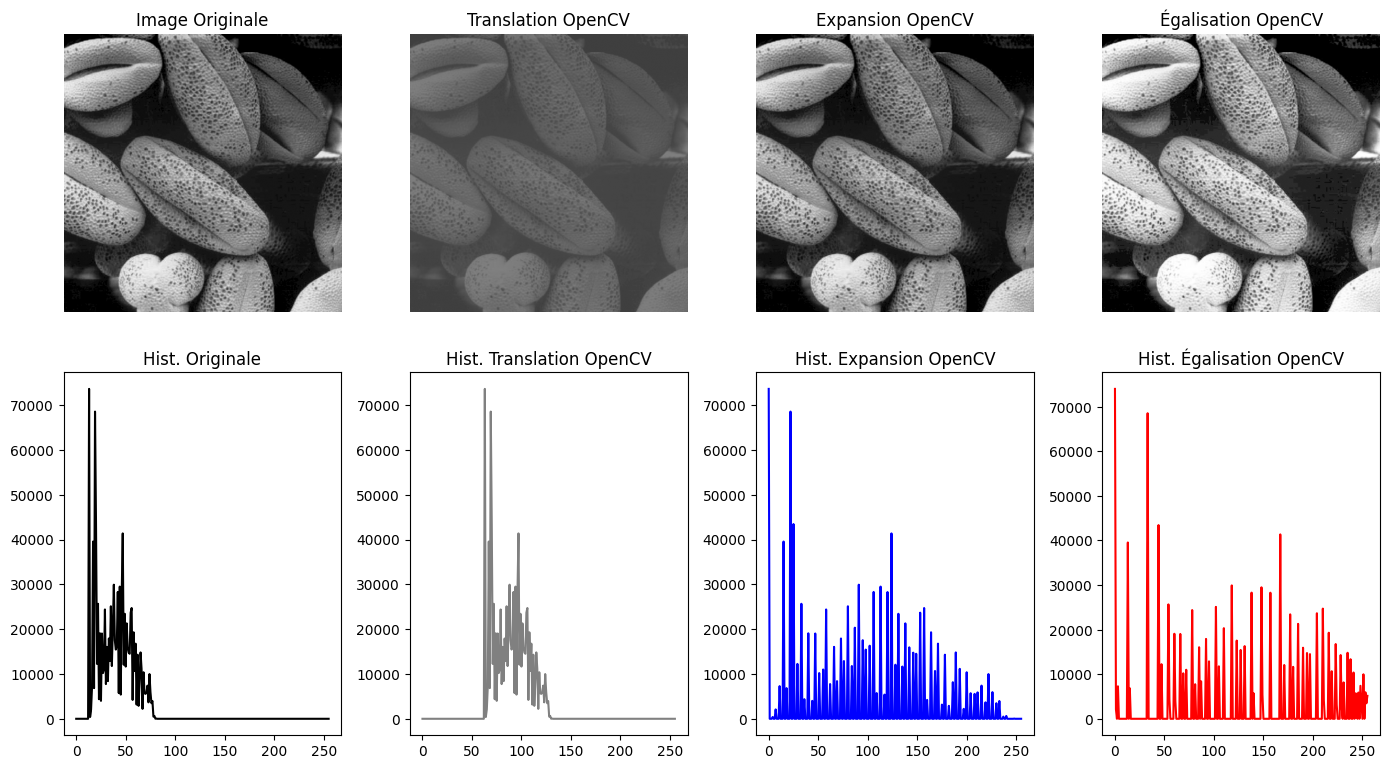

In [115]:

plt.figure(figsize=(14, 8))

plt.subplot(2, 4, 1)
plt.imshow(fig1, cmap='gray')
plt.title('Image Originale')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(fig1_translated_cv, cmap='gray' , vmin=0 , vmax=255)
plt.title('Translation OpenCV')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(fig1_expanded_cv, cmap='gray')
plt.title('Expansion OpenCV')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(fig1_eg_cv, cmap='gray')
plt.title('Égalisation OpenCV')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.plot(hist_fig1, color='black')
plt.title('Hist. Originale')

plt.subplot(2, 4, 6)
plt.plot(hist_fig1_translated_cv, color='gray')
plt.title('Hist. Translation OpenCV')

plt.subplot(2, 4, 7)
plt.plot(hist_fig1_expanded_cv, color='blue')
plt.title('Hist. Expansion OpenCV')

plt.subplot(2, 4, 8)
plt.plot(hist_fig1_eg_cv, color='red')
plt.title('Hist. Égalisation OpenCV')

plt.tight_layout()
plt.show()

In [85]:
#comparaison: Expansion BEST :he Og Histogram is etroit showing low contrast ,Expansion stretches the pixel values to use the full 0-255 range, 
#significantly improving contrast and detail visibility without introducing noise

# ****<span style="color:green">fig2:</span>****

In [116]:
fig2 = cv.imread('Fig2.tif', cv.IMREAD_GRAYSCALE)

# ****<span style="color:green">MANUAL</span>****

In [117]:
#Calculer la luminosité son histogramme normalisé et cumulé: " used a fct this time
Lfig2 = np.mean(fig2)
print( "luminosité",Lfig2)

H2 = cv.calcHist([fig2], [0], None, [256], [0, 256])


#manual norm
H2_norm=[0]*256
for i in range(256) :
    H2_norm[i]= H2[i] / (fig2.shape[0] * fig2.shape[1]) # tot num of pix
print(sum(H2_norm)) # check if =1 we r good to go 


# manual norm cumulative hist 
H2_cum=[0]*256
H2_cum[0] = H2_norm[0]
for i in range(1, 256):
    H2_cum[i] = H2_cum[i-1] + H2_norm[i]  # add up gradually
# Just to make sure no values go above 1
H2_cum = np.clip(H2_cum, 0, 1)

luminosité 31.7340439238653
[1.]


In [118]:
# operations on image

# manual trans
fig2_translated = fig2 + 50
fig2_translated = np.clip(fig2_translated, 0, 255)
fig2_translated=fig2_translated.astype(np.uint8)


In [119]:
# manual expension dynamique

h, w = fig2.shape

# Find the min and max pixel values in the image
min_valeur = np.min(fig2)
max_valeur = np.max(fig2)

# Create Look Up Table "LUT"
LUT = np.zeros(256, dtype=np.uint8)

# Fill LUT with expanded values
for i in range(256):
    LUT[i] = np.clip(255 * (i - min_valeur) / (max_valeur - min_valeur), 0, 255)

# Apply the LUT to every pixel
fig2_expanded = np.zeros_like(fig2)
for x in range(h):
    for y in range(w):
        fig2_expanded[x, y] = LUT[fig2[x, y]]



In [120]:
# manual hist egaliisation
L = 256
h, w = fig2.shape
#Modification des intensités 
H_eg2 = [round((L - 1) * float(H2_cum[i])) for i in range(256)]
#

fig2_eg = np.zeros_like(fig2)
for i in range(h):
    for j in range(w):
        fig2_eg[i, j] = H_eg[fig2_eg[i, j]]

In [121]:
# calcule d'hist

hist_translated2 = cv.calcHist([fig2_translated], [0], None, [256], [0, 256])
hist_expanded2 = cv.calcHist([fig2], [0], None, [256], [0, 256])
hist_equalized2 = cv.calcHist([fig2_eg], [0], None, [256], [0, 256])

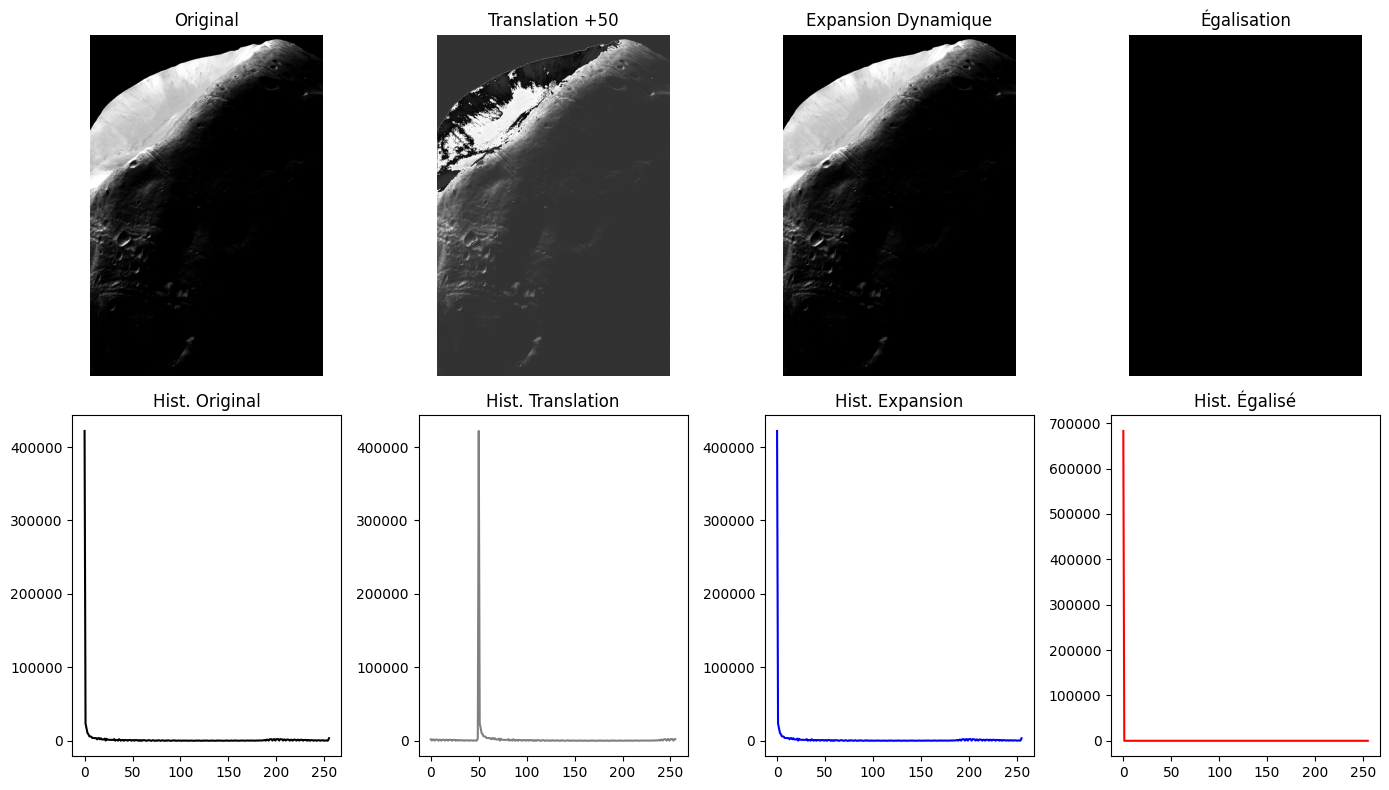

In [122]:

# --- show all results ---
plt.figure(figsize=(14, 8))

plt.subplot(2, 4, 1)
plt.imshow(fig2, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(fig2_translated, cmap='gray')
plt.title('Translation +50')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(fig2_expanded, cmap='gray')
plt.title('Expansion Dynamique')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(fig2_eg, cmap='gray')
plt.title('Égalisation')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.plot(H2, color='black')
plt.title('Hist. Original')

plt.subplot(2, 4, 6)
plt.plot(hist_translated2, color='gray')
plt.title('Hist. Translation')

plt.subplot(2, 4, 7)
plt.plot(hist_expanded2, color='blue')
plt.title('Hist. Expansion')

plt.subplot(2, 4, 8)
plt.plot(hist_equalized2, color='red')
plt.title('Hist. Égalisé')

plt.tight_layout()
plt.show()

# ****<span style="color:green">USING FUNCTIONS</span>****

In [124]:
# Translation  avec opencv
fig2_translated_cv = cv.add(fig2, 50)

# Expansion Dynamique 
fig2_expanded_cv = cv.normalize(fig2, None, 0, 255, cv.NORM_MINMAX)

# Egalisation
fig2_eg_cv = cv.equalizeHist(fig2)

In [125]:
# Calcul des hist
hist_fig2 = cv.calcHist([fig2], [0], None, [256], [0, 256])
hist_fig2_translated_cv = cv.calcHist([fig2_translated_cv], [0], None, [256], [0, 256])
hist_fig2_expanded_cv = cv.calcHist([fig2_expanded_cv], [0], None, [256], [0, 256])
hist_fig2_eg_cv = cv.calcHist([fig2_eg_cv], [0], None, [256], [0, 256])

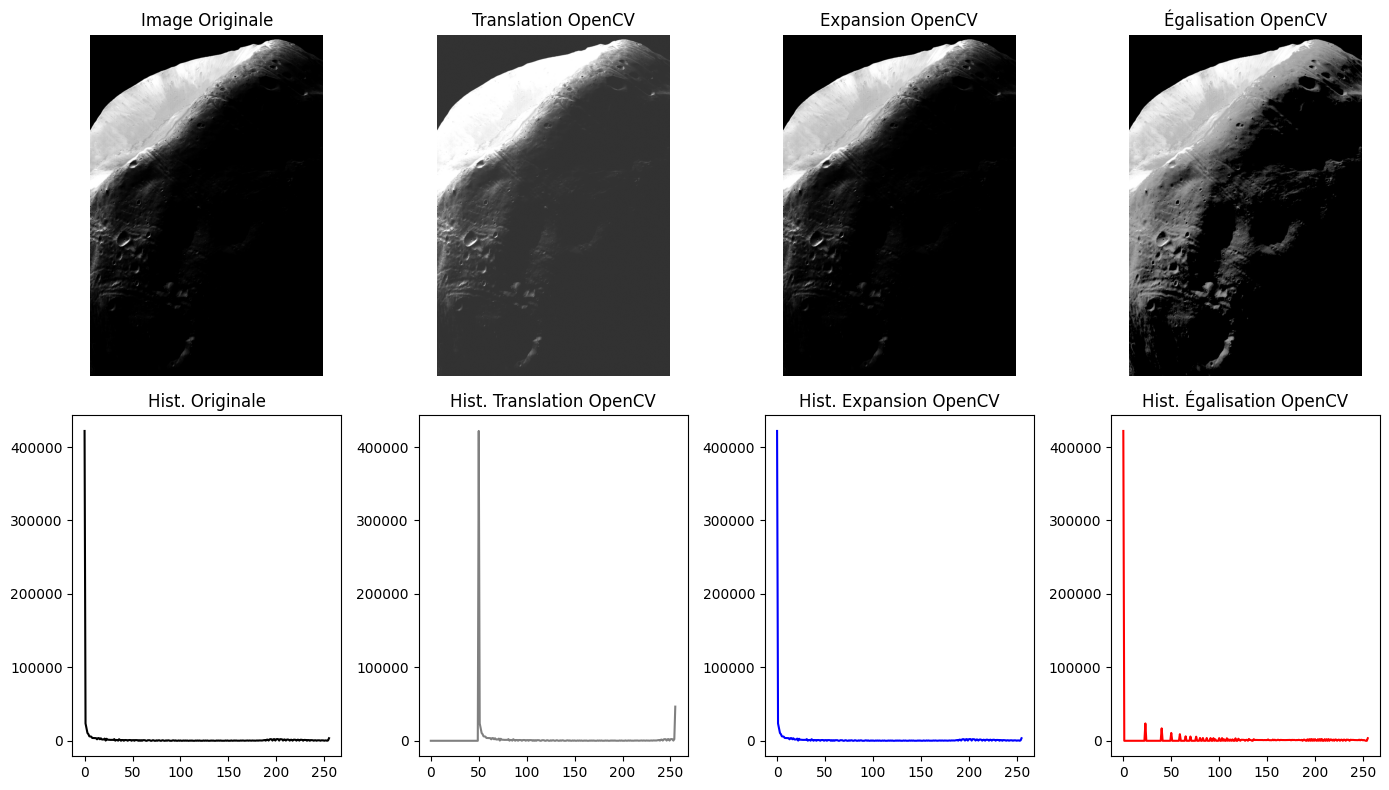

In [126]:

plt.figure(figsize=(14, 8))

plt.subplot(2, 4, 1)
plt.imshow(fig2, cmap='gray')
plt.title('Image Originale')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(fig2_translated_cv, cmap='gray' , vmin=0 , vmax=255)
plt.title('Translation OpenCV')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(fig2_expanded_cv, cmap='gray')
plt.title('Expansion OpenCV')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(fig2_eg_cv, cmap='gray')
plt.title('Égalisation OpenCV')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.plot(hist_fig2, color='black')
plt.title('Hist. Originale')

plt.subplot(2, 4, 6)
plt.plot(hist_fig2_translated_cv, color='gray')
plt.title('Hist. Translation OpenCV')

plt.subplot(2, 4, 7)
plt.plot(hist_fig2_expanded_cv, color='blue')
plt.title('Hist. Expansion OpenCV')

plt.subplot(2, 4, 8)
plt.plot(hist_fig2_eg_cv, color='red')
plt.title('Hist. Égalisation OpenCV')

plt.tight_layout()
plt.show()

In [ ]:
# comparaison : Égalisatio BEST	The Original Image is extremely dark, with the histogram bunched up near 0 (shadows).
#Equalization successfully distributes the very few bright pixels across the entire range, revealing hidden details in the dark areas,
#which is the goal of processing this type of image ( DIST UNIFOTM DES PIX )

# ****<span style="color:green">fig3:</span>****

In [127]:
fig3 = cv.imread('FIG3.tif', cv.IMREAD_GRAYSCALE)

# ****<span style="color:green">manual</span>****

In [128]:
#Calculer la luminosité son histogramme normalisé et cumulé: " used a fct this time
Lfig3 = np.mean(fig3)
print( "luminosité",Lfig3)

H3 = cv.calcHist([fig3], [0], None, [256], [0, 256])


#manual norm
H3_norm=[0]*256
for i in range(256) :
    H3_norm[i]= H3[i] / (fig3.shape[0] * fig3.shape[1]) # tot num of pix
print(sum(H3_norm)) # check if =1 we r good to go 


# manual norm cumulative hist 
H3_cum=[0]*256
H3_cum[0] = H3_norm[0]
for i in range(1, 256):
    H3_cum[i] = H3_cum[i-1] + H3_norm[i]  # add up gradually
# Just to make sure no values go above 1
H3_cum = np.clip(H3_cum, 0, 1)

luminosité 102.35628571428572
[1.]


In [129]:
# operations on image

# manual trans
fig3_translated = fig3 + 50
fig3_translated = np.clip(fig3_translated, 0, 255)
fig3_translated=fig3_translated.astype(np.uint8)


In [130]:
# manual expension dynamique

h, w = fig3.shape

# Find the min and max pixel values in the image
min_valeur = np.min(fig3)
max_valeur = np.max(fig3)

# Create Look Up Table "LUT"
LUT = np.zeros(256, dtype=np.uint8)

# Fill LUT with expanded values
for i in range(256):
    LUT[i] = np.clip(255 * (i - min_valeur) / (max_valeur - min_valeur), 0, 255)

# Apply the LUT to every pixel
fig3_expanded = np.zeros_like(fig3)
for x in range(h):
    for y in range(w):
        fig3_expanded[x, y] = LUT[fig3[x, y]]



In [132]:
# manual hist egaliisation
L = 256
h, w = fig3.shape
#Modification des intensités 
H_eg3 = [round((L - 1) * float(H1_cum[i])) for i in range(256)]
#

fig3_eg = np.zeros_like(fig3)
for i in range(h):
    for j in range(w):
        fig3_eg[i, j] = H_eg3[fig3_eg[i, j]]

In [133]:
# calcule d'hist
hist_translated3 = cv.calcHist([fig3_translated], [0], None, [256], [0, 256])
hist_expanded3 = cv.calcHist([fig3], [0], None, [256], [0, 256])
hist_equalized3 = cv.calcHist([fig3_eg], [0], None, [256], [0, 256])

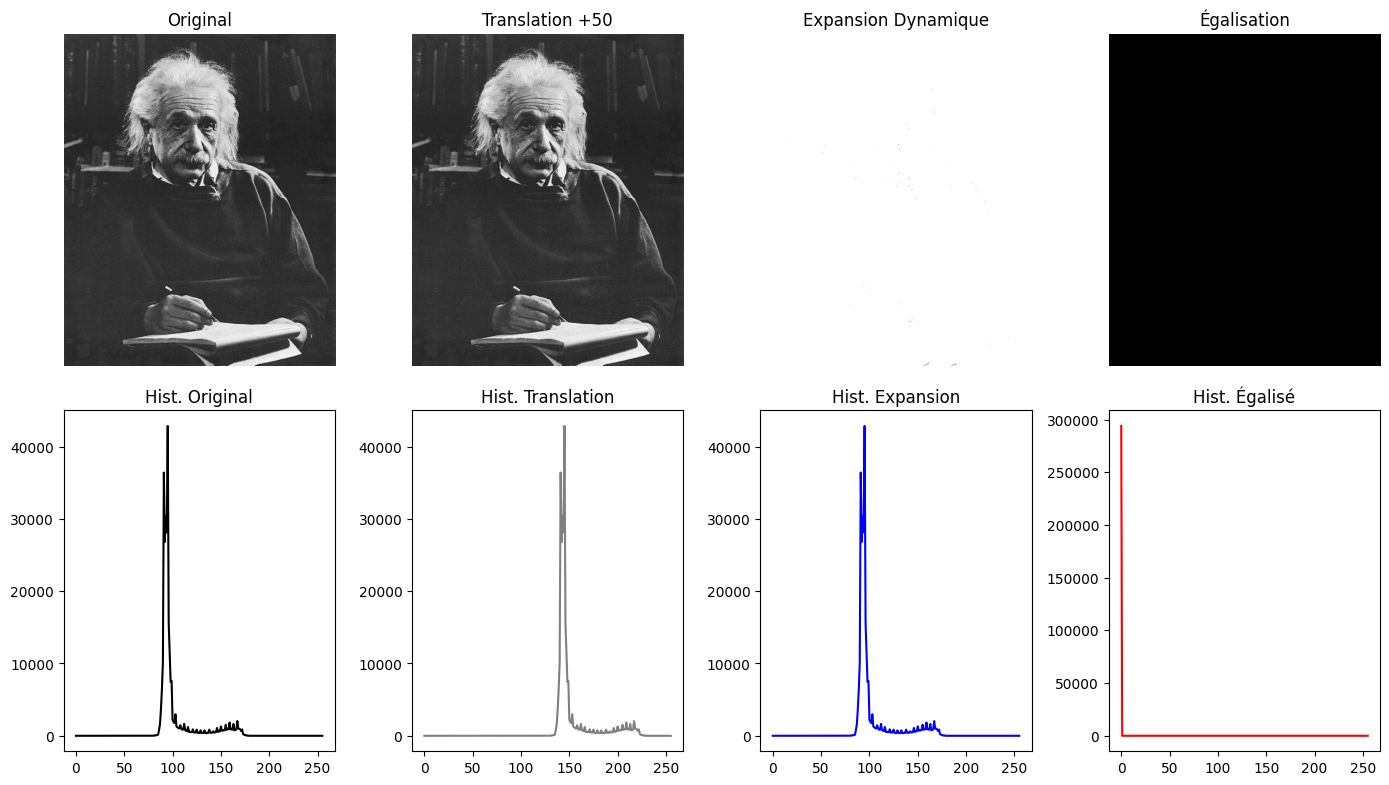

In [134]:

# --- show all results ---
plt.figure(figsize=(14, 8))

plt.subplot(2, 4, 1)
plt.imshow(fig3, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(fig3_translated, cmap='gray')
plt.title('Translation +50')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(fig3_expanded, cmap='gray')
plt.title('Expansion Dynamique')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(fig3_eg, cmap='gray')
plt.title('Égalisation')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.plot(H3, color='black')
plt.title('Hist. Original')

plt.subplot(2, 4, 6)
plt.plot(hist_translated3, color='gray')
plt.title('Hist. Translation')

plt.subplot(2, 4, 7)
plt.plot(hist_expanded3, color='blue')
plt.title('Hist. Expansion')

plt.subplot(2, 4, 8)
plt.plot(hist_equalized3, color='red')
plt.title('Hist. Égalisé')

plt.tight_layout()
plt.show()

# ****<span style="color:green">USING FUNCTIONS</span>****

In [139]:
# Translation  avec opencv
fig3_translated_cv3 = cv.add(fig3, 50)

# Expansion Dynamique 
fig3_expanded_cv3 = cv.normalize(fig3, None, 0, 255, cv.NORM_MINMAX)

# Egalisation
fig3_eg_cv3 = cv.equalizeHist(fig3)

In [141]:
# Calcul des hist
hist_fig3 = cv.calcHist([fig3], [0], None, [256], [0, 256])
hist_fig3_translated_cv3 = cv.calcHist([fig3_translated_cv3], [0], None, [256], [0, 256])
hist_fig3_expanded_cv3 = cv.calcHist([fig3_expanded_cv3], [0], None, [256], [0, 256])
hist_fig3_eg_cv3 = cv.calcHist([fig3_eg_cv3], [0], None, [256], [0, 256])

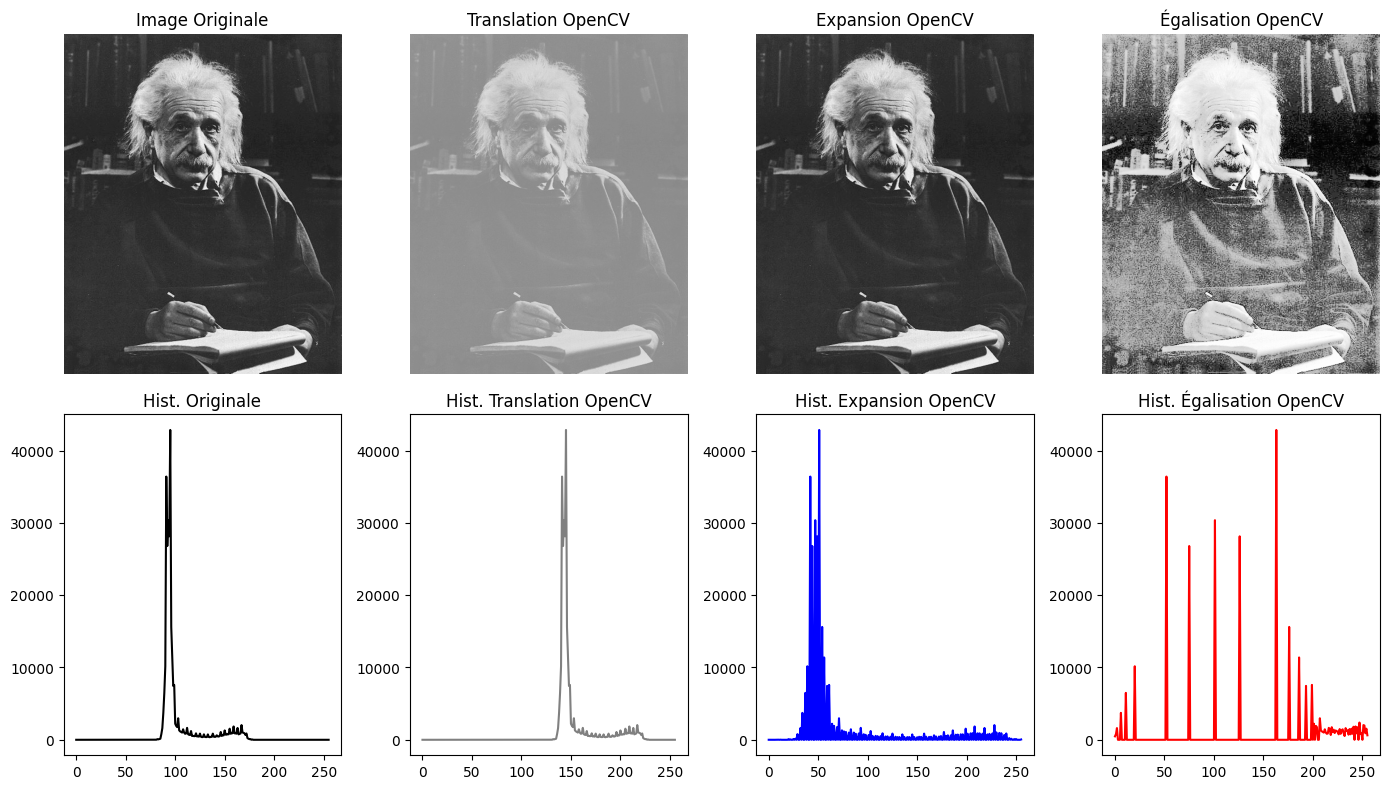

In [143]:

plt.figure(figsize=(14, 8))

plt.subplot(2, 4, 1)
plt.imshow(fig3, cmap='gray')
plt.title('Image Originale')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(fig3_translated_cv3, cmap='gray' , vmin=0 , vmax=255)
plt.title('Translation OpenCV')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(fig3_expanded_cv3, cmap='gray')
plt.title('Expansion OpenCV')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(fig3_eg_cv3, cmap='gray')
plt.title('Égalisation OpenCV')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.plot(hist_fig3, color='black')
plt.title('Hist. Originale')

plt.subplot(2, 4, 6)
plt.plot(hist_fig3_translated_cv3, color='gray')
plt.title('Hist. Translation OpenCV')

plt.subplot(2, 4, 7)
plt.plot(hist_fig3_expanded_cv3, color='blue')
plt.title('Hist. Expansion OpenCV')

plt.subplot(2, 4, 8)
plt.plot(hist_fig3_eg_cv3, color='red')
plt.title('Hist. Égalisation OpenCV')

plt.tight_layout()
plt.show()

In [ ]:
# comparaison: Expansion BEST The Original Histogram is very concentrated around the midtones "grays" approx 100-150, 
#leading to a somewhat flat, hazy look 
#Expansion stretches the tones to fill the 0-255 range, creating sharper contrast and depth while retaining a natural appearance.